In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [4]:
print(gdp_df.head(6))

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2018  1734.723214              NaN
1     Afghanistan  2017  1758.465636              NaN
2     Afghanistan  2016  1757.023490              NaN
3     Afghanistan  2015  1766.593077              NaN
4     Afghanistan  2014  1795.735834              NaN
5     Afghanistan  2013  1807.762344              NaN


In [5]:
internet_df = pd.read_csv('../data/internet_use.csv')

In [6]:
print(internet_df.head(6))

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
5     Afghanistan  2009  3.550000              NaN


In [7]:
print(gdp_df.shape)

(6731, 4)


gpd_df has 6731 rows and 4 columns

In [8]:
print(internet_df.shape)

(4677, 4)


internet_df has 4677 rows and 4 columns

In [9]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6731 entries, 0 to 6730
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6731 non-null   object 
 1   Year             6731 non-null   object 
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 210.5+ KB
None


In [10]:
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4676 non-null   object 
 1   Year             4676 non-null   object 
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), object(2)
memory usage: 146.3+ KB
None


In [11]:
del gdp_df['Value Footnotes']
print(gdp_df.head())

  Country or Area  Year        Value
0     Afghanistan  2018  1734.723214
1     Afghanistan  2017  1758.465636
2     Afghanistan  2016  1757.023490
3     Afghanistan  2015  1766.593077
4     Afghanistan  2014  1795.735834


In [12]:
del internet_df['Value Footnotes']
print(gdp_df.head())

  Country or Area  Year        Value
0     Afghanistan  2018  1734.723214
1     Afghanistan  2017  1758.465636
2     Afghanistan  2016  1757.023490
3     Afghanistan  2015  1766.593077
4     Afghanistan  2014  1795.735834


In [13]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2018     1734.723214
1  Afghanistan  2017     1758.465636
2  Afghanistan  2016     1757.023490
3  Afghanistan  2015     1766.593077
4  Afghanistan  2014     1795.735834


In [14]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


In [15]:
gdp_no_foot = gdp_df.drop([6729, 6730])
print(gdp_no_foot.tail())

       Country  Year  GDP_Per_Capita
6724  Zimbabwe  1994     2768.309953
6725  Zimbabwe  1993     2572.870395
6726  Zimbabwe  1992     2591.007534
6727  Zimbabwe  1991     2906.272849
6728  Zimbabwe  1990     2819.549467


In [16]:
internet_no_foot = internet_df.drop(internet_df[internet_df.index >= 4495].index)

In [17]:
print(internet_no_foot.tail())

       Country  Year  Internet_Users_Pct
4490  Zimbabwe  1997            0.033080
4491  Zimbabwe  1996            0.016790
4492  Zimbabwe  1995            0.007684
4493  Zimbabwe  1994            0.001739
4494  Zimbabwe  1990            0.000000


In [18]:
gdp_and_internet_use = pd.merge(gdp_no_foot, internet_no_foot, how='outer', on = ['Country', 'Year'])
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2018     1734.723214                 NaN
1  Afghanistan  2017     1758.465636                 NaN
2  Afghanistan  2016     1757.023490                 NaN
3  Afghanistan  2015     1766.593077                 NaN
4  Afghanistan  2014     1795.735834                6.39
                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
7700  Virgin Islands (U.S.)  1997             NaN            6.948369
7701  Virgin Islands (U.S.)  1996             NaN            4.647186
7702  Virgin Islands (U.S.)  1995             NaN            2.801958
7703  Virgin Islands (U.S.)  1994             NaN            0.940645
7704  Virgin Islands (U.S.)  1990             NaN            0.000000


In [19]:
print(gdp_and_internet_use.shape)

(7705, 4)


I chose to do an outer join to keep all rows, no rows were dropped.

In [20]:
print(gdp_and_internet_use.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7705 entries, 0 to 7704
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             7705 non-null   object 
 1   Year                7705 non-null   object 
 2   GDP_Per_Capita      6729 non-null   float64
 3   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(2), object(2)
memory usage: 301.0+ KB
None


In [21]:
subset = gdp_and_internet_use[gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])]
print(subset.head(15))

                 Country  Year  GDP_Per_Capita  Internet_Users_Pct
4            Afghanistan  2014     1795.735834            6.390000
9            Afghanistan  2009     1502.354073            3.550000
14           Afghanistan  2004     1025.208245            0.105809
21               Albania  2014    10700.993216           60.100000
26               Albania  2009     9525.377979           41.200000
31               Albania  2004     7001.054082            2.420388
50               Algeria  2014    13557.769757           18.090000
55               Algeria  2009    12697.690780           11.230000
60               Algeria  2004    11845.170512            4.634475
79                Angola  2014     6813.052106           21.260000
84                Angola  2009     6292.534856            6.000000
89                Angola  2004     4604.657044            0.464815
108  Antigua and Barbuda  2014    20440.540555           64.000000
113  Antigua and Barbuda  2009    22568.626530           42.00

In [22]:
df_2004 = subset[subset['Year'] == '2004']
print(df_2004.head())

                 Country  Year  GDP_Per_Capita  Internet_Users_Pct
14           Afghanistan  2004     1025.208245            0.105809
31               Albania  2004     7001.054082            2.420388
60               Algeria  2004    11845.170512            4.634475
89                Angola  2004     4604.657044            0.464815
118  Antigua and Barbuda  2004    21161.123532           24.266544


In [23]:
df_2009 = subset[subset['Year'] == '2009']
df_2014 = subset[subset['Year'] == '2014']

In [24]:
print(max(df_2004['Internet_Users_Pct']))

83.89


In [25]:
print(df_2004[df_2004['Internet_Users_Pct'] == max(df_2004['Internet_Users_Pct'])])
print()
print(df_2009[df_2009['Internet_Users_Pct'] == max(df_2009['Internet_Users_Pct'])])
print()
print(df_2014[df_2014['Internet_Users_Pct'] == max(df_2014['Internet_Users_Pct'])])

     Country  Year  GDP_Per_Capita  Internet_Users_Pct
5852  Sweden  2004    40177.850408               83.89

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2586  Iceland  2009    41505.084834                93.0

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2581  Iceland  2014    42774.888849               98.16


2004 Highest Internet Percentage = Sweden, 83.89 percent
2009 Highest Internet Percentage = Iceland, 93.0 percent
2014 Highest Internet Percentage = Iceland, 98.16 percent

In [26]:
print(df_2004[df_2004['Internet_Users_Pct'] == min(df_2004['Internet_Users_Pct'])])
print()
print(df_2009[df_2009['Internet_Users_Pct'] == min(df_2009['Internet_Users_Pct'])])
print()
print(df_2014[df_2014['Internet_Users_Pct'] == min(df_2014['Internet_Users_Pct'])])

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6949  Dem. People's Rep. of Korea  2004             NaN                 0.0

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6944  Dem. People's Rep. of Korea  2009             NaN                 0.0

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6940  Dem. People's Rep. of Korea  2014             NaN                 0.0


For 2004, 2009, and 2014 the Democratic People's Republic of Korea had the lowest internet users percentage of 0.0.

In [27]:
print(df_2014[df_2014['GDP_Per_Capita'] == max(df_2014['GDP_Per_Capita'])])

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3639  Macao SAR, China  2014   130439.106674                 NaN


2014 Highest GDP per capita = Macao, 130,439.106674

In [28]:
print(df_2014[df_2014['GDP_Per_Capita'] == min(df_2014['GDP_Per_Capita'])])

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1014  Central African Republic  2014      672.681648                 NaN


2014 Lowest GDP per capita = Central African Republic, 672.681648

Text(0.5, 1.0, '2004 Data')

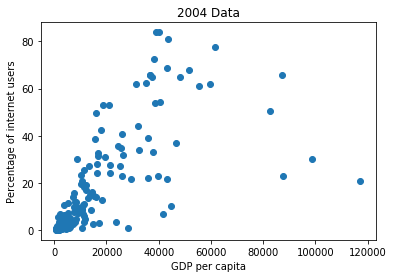

In [29]:
plt.scatter(df_2004['GDP_Per_Capita'], df_2004['Internet_Users_Pct'])
plt.xlabel('GDP per capita')
plt.ylabel('Percentage of internet users')
plt.title('2004 Data')

Text(0.5, 1.0, '2009 Data')

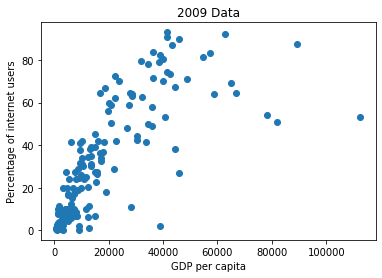

In [30]:
plt.scatter(df_2009['GDP_Per_Capita'], df_2009['Internet_Users_Pct'])
plt.xlabel('GDP per capita')
plt.ylabel('Percentage of internet users')
plt.title('2009 Data')

Text(0.5, 1.0, '2014 Data')

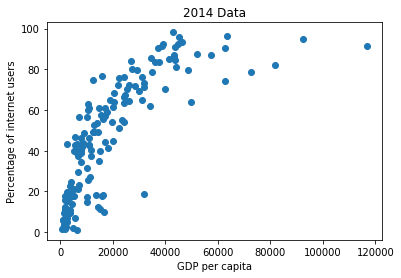

In [31]:
plt.scatter(df_2014['GDP_Per_Capita'], df_2014['Internet_Users_Pct'])
plt.xlabel('GDP per capita')
plt.ylabel('Percentage of internet users')
plt.title('2014 Data')

Between the decade between 2004 and 2014 the correlation between GDP and internet use became tighter. Also, over time, distrubtion of internet users went up. It seems from the scatter plots, but is tough to tell that GDP per capita went up as well over time.

Text(0.5, 1.0, '2014 GDP Histogram')

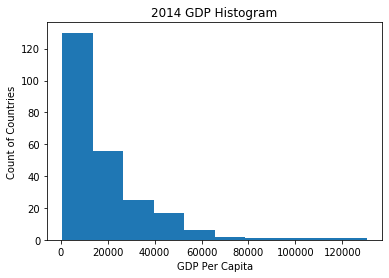

In [35]:
plt.hist(df_2014['GDP_Per_Capita'])
plt.xlabel('GDP Per Capita')
plt.ylabel('Count of Countries')
plt.title('2014 GDP Histogram')

2014 GDP per capita data are unimodal

Text(0.5, 1.0, '2014 Internet Use Histogram')

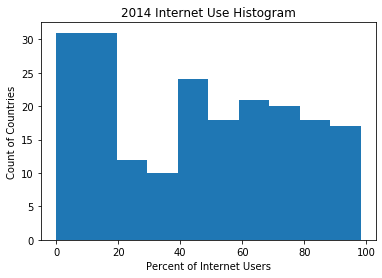

In [36]:
plt.hist(df_2014['Internet_Users_Pct'])
plt.xlabel('Percent of Internet Users')
plt.ylabel('Count of Countries')
plt.title('2014 Internet Use Histogram')

2014 GDP per capita data are _not_ unimodal

In [43]:
print(df_2014.nlargest(5, 'Internet_Users_Pct'))

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2581  Iceland  2014    42774.888849               98.16
6772  Bermuda  2014             NaN               96.80
4530   Norway  2014    63328.259526               96.30
1404  Denmark  2014    45057.083449               95.99
6732  Andorra  2014             NaN               95.90


Top 5 Internet Users Percentage in 2014 = Iceland, Bermuda, Norway, Denmark, Andorra

In [45]:
top_5_internet = subset[subset['Country'].isin(df_2014.nlargest(5, 'Internet_Users_Pct')['Country'])]
print(top_5_internet)
print()
print(top_5_internet.shape)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
542   Bermuda  2009    57151.919132           83.250000
547   Bermuda  2004    55452.638880           60.990867
1404  Denmark  2014    45057.083449           95.990000
1409  Denmark  2009    43382.615688           86.840000
1414  Denmark  2004    43670.446201           80.930000
2581  Iceland  2014    42774.888849           98.160000
2586  Iceland  2009    41505.084834           93.000000
2591  Iceland  2004    38893.378798           83.880000
4530   Norway  2014    63328.259526           96.300000
4535   Norway  2009    62617.153609           92.080000
4540   Norway  2004    61612.275634           77.690000
6732  Andorra  2014             NaN           95.900000
6737  Andorra  2009             NaN           78.530000
6742  Andorra  2004             NaN           26.837954
6772  Bermuda  2014             NaN           96.800000

(15, 4)


In [50]:
top_5_internet = top_5_internet.sort_values(by=['Country', 'Year'])
print(top_5_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
6742  Andorra  2004             NaN           26.837954
6737  Andorra  2009             NaN           78.530000
6732  Andorra  2014             NaN           95.900000
547   Bermuda  2004    55452.638880           60.990867
542   Bermuda  2009    57151.919132           83.250000
6772  Bermuda  2014             NaN           96.800000
1414  Denmark  2004    43670.446201           80.930000
1409  Denmark  2009    43382.615688           86.840000
1404  Denmark  2014    45057.083449           95.990000
2591  Iceland  2004    38893.378798           83.880000
2586  Iceland  2009    41505.084834           93.000000
2581  Iceland  2014    42774.888849           98.160000
4540   Norway  2004    61612.275634           77.690000
4535   Norway  2009    62617.153609           92.080000
4530   Norway  2014    63328.259526           96.300000


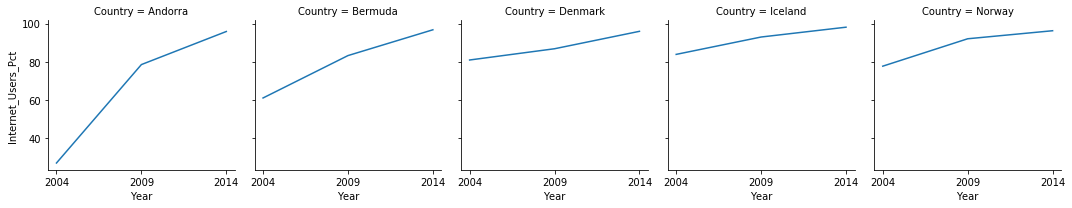

In [51]:
g = sns.FacetGrid(top_5_internet, col='Country')
g.map(plt.plot, 'Year', 'Internet_Users_Pct')

Andorra had (by far) the greatest growth in internet use between 2004 and 2014. No obvious plotting issue with Bermuda.

In [52]:
bottom_5_internet = subset[subset['Country'].isin(df_2014.nsmallest(5, 'Internet_Users_Pct')['Country'])]
print(bottom_5_internet)
print()
print(bottom_5_internet.shape)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
794                       Burundi  2014      768.469837            1.380000
799                       Burundi  2009      721.063140            0.900000
804                       Burundi  2004      708.833720            0.349060
1722                      Eritrea  2009     1950.533339            0.540000
1727                      Eritrea  2004     2317.349879                 NaN
6044                  Timor-Leste  2014     6466.737732            1.140000
6049                  Timor-Leste  2009     9275.529371            0.185252
6054                  Timor-Leste  2004     4898.575839                 NaN
6940  Dem. People's Rep. of Korea  2014             NaN            0.000000
6944  Dem. People's Rep. of Korea  2009             NaN            0.000000
6949  Dem. People's Rep. of Korea  2004             NaN            0.000000
6999                      Eritrea  2014             NaN            0.990000
7521        

In [53]:
bottom_5_internet = bottom_5_internet.sort_values(by=['Country', 'Year'])
print(bottom_5_internet)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
804                       Burundi  2004      708.833720            0.349060
799                       Burundi  2009      721.063140            0.900000
794                       Burundi  2014      768.469837            1.380000
6949  Dem. People's Rep. of Korea  2004             NaN            0.000000
6944  Dem. People's Rep. of Korea  2009             NaN            0.000000
6940  Dem. People's Rep. of Korea  2014             NaN            0.000000
1727                      Eritrea  2004     2317.349879                 NaN
1722                      Eritrea  2009     1950.533339            0.540000
6999                      Eritrea  2014             NaN            0.990000
7530                      Somalia  2004             NaN            1.053455
7525                      Somalia  2009             NaN            1.160611
7521                      Somalia  2014             NaN            1.630000
6054        

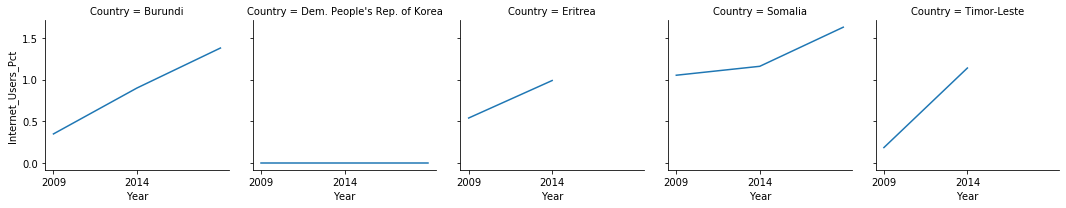

In [54]:
g = sns.FacetGrid(bottom_5_internet, col='Country')
g.map(plt.plot, 'Year', 'Internet_Users_Pct')

Dem. People's Rep. of Korea has the consistently lowest percentage of internet users.

In [73]:
# Repeating analysis of bottom 5 countries after dropping NaN rows.

subset_dropna = subset[subset['Internet_Users_Pct'].notna()]
print(subset_dropna.tail())

                    Country  Year  GDP_Per_Capita  Internet_Users_Pct
7668               Viet Nam  2009             NaN           26.550000
7673               Viet Nam  2004             NaN            7.642409
7683  Virgin Islands (U.S.)  2014             NaN           50.070000
7688  Virgin Islands (U.S.)  2009             NaN           27.396510
7693  Virgin Islands (U.S.)  2004             NaN           27.377009


In [74]:
df_2004_dropna = subset_dropna[subset_dropna['Year'] == '2004']
df_2009_dropna = subset_dropna[subset_dropna['Year'] == '2009']
df_2014_dropna = subset_dropna[subset_dropna['Year'] == '2014']

In [76]:
# Dropping Timor-Leste and Eritrea b/c it has no value for 2004

df_2014_dropna= df_2014_dropna[df_2014_dropna['Country'] != 'Timor-Leste']
df_2014_dropna= df_2014_dropna[df_2014_dropna['Country'] != 'Eritrea']

In [77]:
bottom_5_internet2 = subset_dropna[subset_dropna['Country'].isin(df_2014_dropna.nsmallest(5, 'Internet_Users_Pct')['Country'])]
bottom_5_internet2 = bottom_5_internet2.sort_values(by=['Country', 'Year'])

print(bottom_5_internet2)
print()
print(bottom_5_internet2.shape)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
804                       Burundi  2004      708.833720            0.349060
799                       Burundi  2009      721.063140            0.900000
794                       Burundi  2014      768.469837            1.380000
6949  Dem. People's Rep. of Korea  2004             NaN            0.000000
6944  Dem. People's Rep. of Korea  2009             NaN            0.000000
6940  Dem. People's Rep. of Korea  2014             NaN            0.000000
2302                       Guinea  2004     1583.864869            0.508819
2297                       Guinea  2009     1626.288463            0.940000
2292                       Guinea  2014     1836.532318            1.720000
4424                        Niger  2004      757.751262            0.189934
4419                        Niger  2009      778.982257            0.760000
4414                        Niger  2014      900.136918            1.950000
7530        

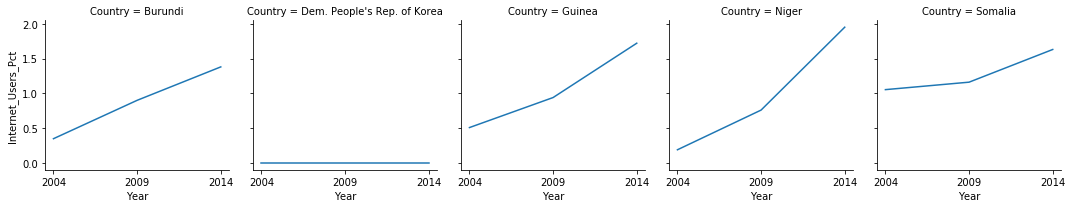

In [78]:
g = sns.FacetGrid(bottom_5_internet2, col='Country')
g.map(plt.plot, 'Year', 'Internet_Users_Pct')

In [56]:
top_5_gdp = subset[subset['Country'].isin(df_2014.nlargest(5, 'GDP_Per_Capita')['Country'])]
top_5_gdp = top_5_gdp.sort_values(by=['Country', 'Year'])

print(top_5_gdp)
print()
print(top_5_gdp.shape)

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
717             Brunei  2004    83963.238066                 NaN
712             Brunei  2009    79485.001581                 NaN
707             Brunei  2014    76448.593329                 NaN
3620        Luxembourg  2004    87209.819367           65.880000
3615        Luxembourg  2009    89098.734264           87.310000
3610        Luxembourg  2014    92349.186429           94.670000
3649  Macao SAR, China  2004    60791.976853                 NaN
3644  Macao SAR, China  2009    79955.986107                 NaN
3639  Macao SAR, China  2014   130439.106674                 NaN
5013             Qatar  2004   117271.427067           20.701648
5008             Qatar  2009   112525.718267           53.100000
5003             Qatar  2014   116693.507701           91.490000
5326         Singapore  2004    59732.958543           62.000000
5321         Singapore  2009    64934.799310           69.000000
5316         Singapore  2

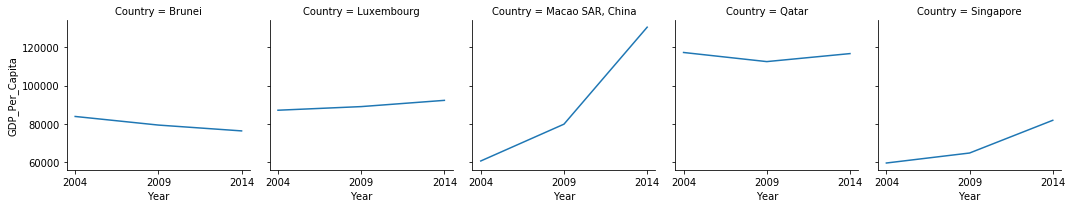

In [57]:
g = sns.FacetGrid(top_5_gdp, col='Country')
g.map(plt.plot, 'Year', 'GDP_Per_Capita')

In [58]:
bottom_5_gdp = subset[subset['Country'].isin(df_2014.nsmallest(5, 'GDP_Per_Capita')['Country'])]
bottom_5_gdp = bottom_5_gdp.sort_values(by=['Country', 'Year'])

print(bottom_5_gdp)
print()
print(bottom_5_gdp.shape)

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
804                    Burundi  2004      708.833720            0.349060
799                    Burundi  2009      721.063140            0.900000
794                    Burundi  2014      768.469837            1.380000
1024  Central African Republic  2004      848.689032                 NaN
1019  Central African Republic  2009      949.551325                 NaN
1014  Central African Republic  2014      672.681648                 NaN
1385           Dem. Rep. Congo  2004      577.483297                 NaN
1380           Dem. Rep. Congo  2009      636.875743                 NaN
1375           Dem. Rep. Congo  2014      784.872656                 NaN
3707                    Malawi  2004      862.392437            0.347505
3702                    Malawi  2009     1037.598513            1.070000
3697                    Malawi  2014     1142.530804            5.830000
4424                     Niger  2004      757.75126

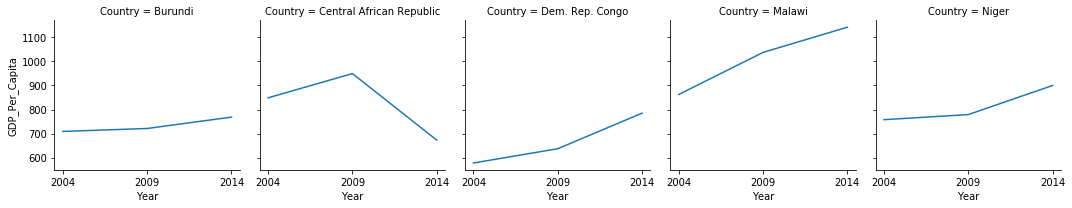

In [59]:
g = sns.FacetGrid(bottom_5_gdp, col='Country')
g.map(plt.plot, 'Year', 'GDP_Per_Capita')

I was surprised to see the dramatic drop in GDP per capita in the Central African Republic between 2009 and 2014. Research found that a smoldering civil war which began in 2004 escalated in 2011. The civil war in the Central African Republic continued through 2015.